In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as pl


# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA

__author__ = 'gulinvladimir'

def main():
    

    train_data = np.loadtxt("spam.train.txt")
    test_data  = np.loadtxt("spam.test.txt")

    total_data = np.concatenate(([train_data, test_data]), axis=0)

    visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

    number_of_features = len(train_data[0, :])

    use_features_in_tree = (int)(0.9 * number_of_features)

    # Create the random forest object which will include all the parameters
    # for the fit
    forest = RandomForestClassifier(n_estimators = 10, max_features=use_features_in_tree)

    # Fit the training data to the Survived labels and create the decision trees
    forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

    # Take the same decision trees and run it on the test data
    prediction = forest.predict(test_data[0::, 1::])

    print(classification_report(test_data[0::, 0], prediction))


def visualize_data(total_data, train_size, test_size):
    ''' Visualization of total spam data
    :param total_data: Train and test data
    :param train_size: Size of train set
    :param test_size: Size of test set
    :return:
    '''
    pca = PCA(n_components=2)
    projection = pca.fit_transform(total_data)

    fig = pl.figure(figsize=(8, 8))

    pl.rcParams['legend.fontsize'] = 10
    pl.plot(projection[0:train_size, 0], projection[0:train_size, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='Train')
    pl.plot(projection[train_size:train_size+test_size, 0], projection[train_size:train_size+test_size, 1],
            'o', markersize=7, color='red', alpha=0.5, label='Test')
    pl.title('Spam data')
    pl.show()


def classification_report(y_true, y_pred):
    ''' Computes clasification metrics

    :param y_true - original class label
    :param y_pred - predicted class label
    :return presicion, recall for each class; micro_f1 measure, macro_f1 measure
    '''
    last_line_heading = 'avg / total'
    final_line_heading = 'final score'

    labels = unique_labels(y_true, y_pred)

    width = len(last_line_heading)
    target_names = ['{0}'.format(l) for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    fmt = '%% %ds' % width  # first column: class name
    fmt += '  '
    fmt += ' '.join(['% 9s' for _ in headers])
    fmt += '\n'

    headers = [""] + headers
    report = fmt % tuple(headers)
    report += '\n'

    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred,
                                                  labels=labels,
                                                  average=None)

    f1_macro = 0
    precision_macro = 0
    recall_macro = 0

    for i, label in enumerate(labels):
        values = [target_names[i]]
        f1_macro += f1[i]
        precision_macro += p[i]
        recall_macro += r[i]
        for v in (p[i], r[i], f1[i]):
            values += ["{0:0.5f}".format(v)]
        values += ["{0}".format(s[i])]
        report += fmt % tuple(values)

    report += '\n'

    # compute averages
    values = [last_line_heading]
    for v in (np.average(p, weights=s),
              np.average(r, weights=s),
              np.average(f1, weights=s)):
        values += ["{0:0.5f}".format(v)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    values = [final_line_heading]
    for v in (precision_macro, recall_macro, f1_macro):
        values += ["{0:0.5f}".format(v / labels.size)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    return report





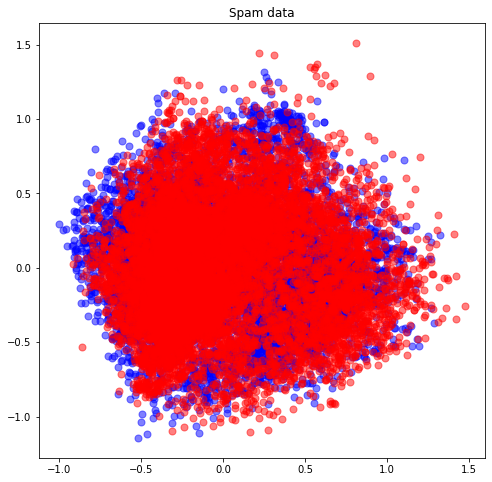

             precision    recall  f1-score   support

        0.0    0.59201   0.84506   0.69625      2033
        1.0    0.95597   0.85242   0.90123      8023

avg / total    0.88239   0.85093   0.85979     10056
final score    0.77399   0.84874   0.79874     10056



In [2]:
main()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
cl_names = ["KNeighborsClassifier", "Linear SVM",
         "DecisionTreeClassifier", "AdaBoostClassifier", "Random forest"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=550, max_features=0.5)
]

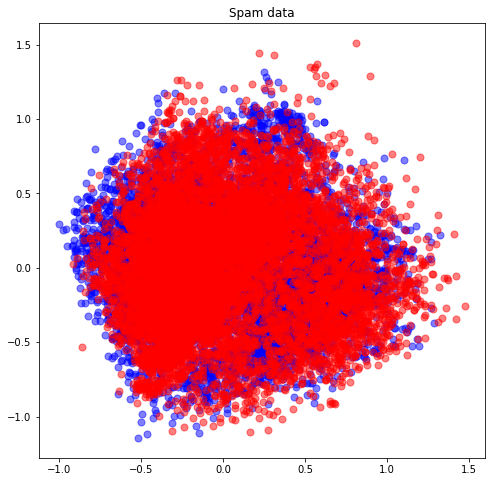

In [5]:
train_data = np.loadtxt("spam.train.txt")
test_data  = np.loadtxt("spam.test.txt")

total_data = np.concatenate(([train_data, test_data]), axis=0)

visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

number_of_features = len(train_data[0, :])

In [6]:
X_train = train_data[:,1:]
y_train = train_data[:,0]
X_test = test_data[:,1:]
y_test = test_data[:,0]

In [7]:
scores_train = {}
scores_test = {}

for name, clf in zip(cl_names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_train)
        score = f1_score(y_train, y_pred)
        scores_train[name] = score
        
        y_pred_test = clf.predict(X_test)
        score = f1_score(y_test, y_pred_test)
        scores_test[name] = score
        print(name)
        print(classification_report(y_test, y_pred_test))

KNeighborsClassifier
             precision    recall  f1-score   support

        0.0    0.78589   0.93704   0.85484      2033
        1.0    0.98323   0.93531   0.95867      8023

avg / total    0.94333   0.93566   0.93768     10056
final score    0.88456   0.93617   0.90675     10056

Linear SVM
             precision    recall  f1-score   support

        0.0    0.70454   0.95475   0.81078      2033
        1.0    0.98740   0.89854   0.94088      8023

avg / total    0.93021   0.90990   0.91457     10056
final score    0.84597   0.92664   0.87583     10056

DecisionTreeClassifier
             precision    recall  f1-score   support

        0.0    0.60373   0.84309   0.70361      2033
        1.0    0.95580   0.85978   0.90525      8023

avg / total    0.88462   0.85640   0.86448     10056
final score    0.77977   0.85143   0.80443     10056

AdaBoostClassifier
             precision    recall  f1-score   support

        0.0    0.92297   0.64830   0.76163      2033
        1.0    

In [8]:
def plot_scores(scores, title):
    fig, ax = plt.subplots(figsize=(12, 10))
    rects = ax.bar(range(len(scores)),scores.values(),tick_label=cl_names)

    for rect, name in zip(rects, cl_names):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                round(scores[name],4),
                ha='center', va='bottom')
        ax.set_title(title)

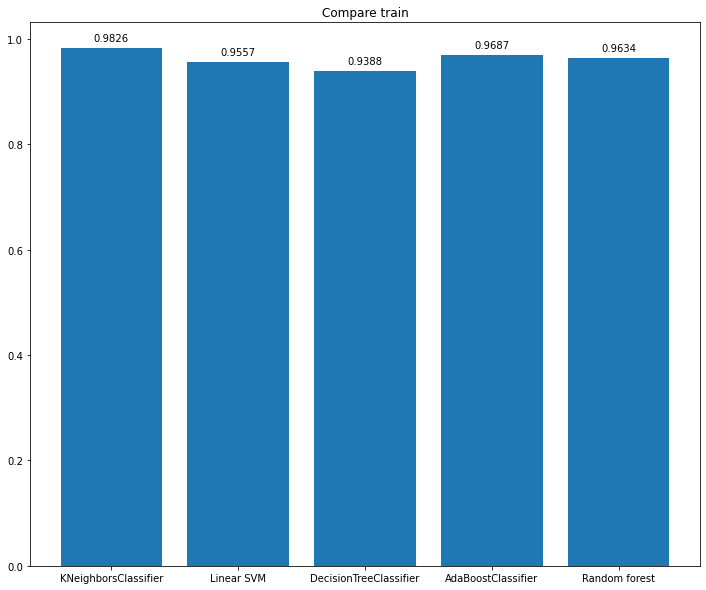

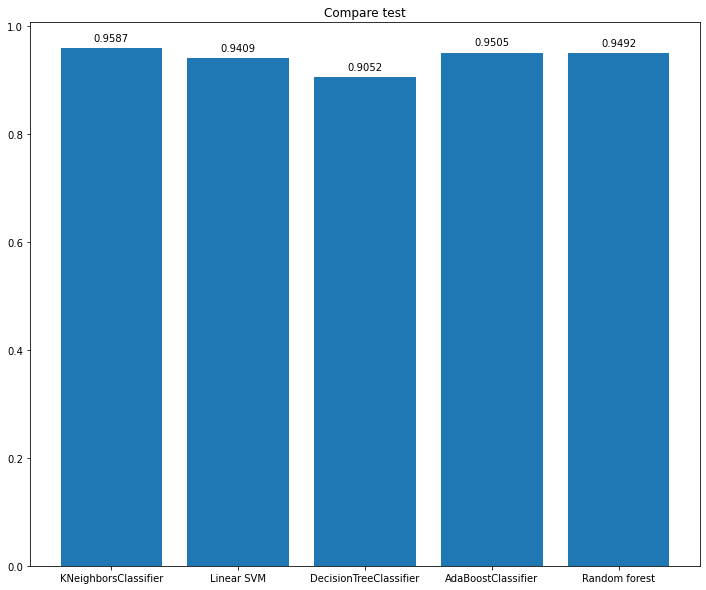

In [9]:
plot_scores(scores_train, "Compare train")
plot_scores(scores_test, "Compare test")



In [10]:
from itertools import product

params = product(
    range(50, 200, 100), # n_estimators
    np.linspace(0.5, 1.0, 3) # max_features
)

best_n_estimators = 50
best_max_features = 0.5
res_score = 0
res_model = None
scores = []

for n_estimators, max_features in tqdm(list(params)):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_test, y_pred)
    scores.append(score)
    if score > res_score:
        best_n_estimators = n_estimators
        best_max_features = max_features
        res_score = score
        res_model = clf

100%|██████████| 6/6 [01:59<00:00, 19.85s/it]


In [11]:
best_n_estimators, best_max_features, res_score

(150, 0.5, 0.9582618639222413)

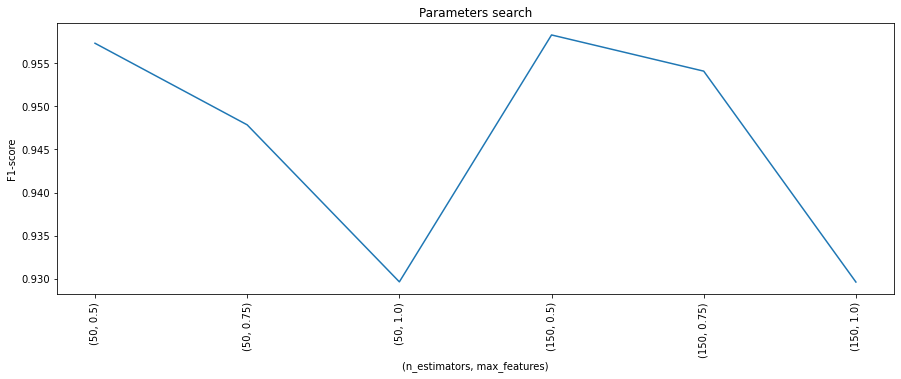

In [12]:
params = product(
    range(50, 200, 100), # n_estimators
    np.linspace(0.5, 1.0, 3) # max_features
)
plt.figure(figsize=(15, 5))
plt.title('Parameters search')
plt.xlabel('(n_estimators, max_features)')
plt.ylabel('F1-score')
plt.tick_params(axis='x', labelrotation=90)
plt.plot([str(i) for i in list(params)], scores)

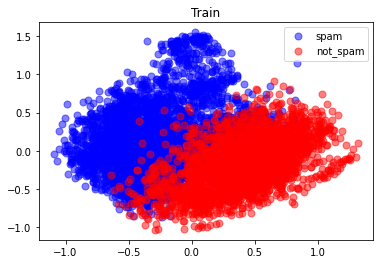

In [13]:

from sklearn.decomposition import PCA

def visualize_classes(data, title):
    pca = PCA(n_components=2)
    projection = pca.fit_transform(data[:,1:])
    projection_spam = projection[data[:,0] == 1]
    projection_notspam = projection[data[:,0] == 0]

    plt.plot(projection_spam[:, 0], projection_spam[:, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='spam')
    plt.plot(projection_notspam[:, 0], projection_notspam[:, 1],
            'o', markersize=7, color='red', alpha=0.5, label='not_spam')
    plt.legend(loc='best')
    plt.title(title)


visualize_classes(train_data, "Train")


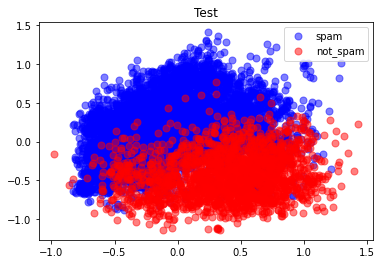

In [14]:
visualize_classes(test_data, "Test")



Почему качество классификации для класса spam выше, чем для класса notspam? 
Kлассы не сбалансированы: в обучающей выборке больше примеров спама. При этом, возможно, у спама больше общих признаков.